In [3]:
import os

In [13]:
SampleDataDir = "C:/Users/Rishabh/Documents/DICOMIZER/SampleData"

In [14]:
print(os.listdir(SampleDataDir))

['00000030_001.png', '00000031_000.png', '0a4e1a29ffff.png', '0a902c80d5da.png', '0abf0c485f66.png', '0ae2dd2e09ea.png', 'a5ccd135-ac4b5c54-9a41cab2-06306435-c10bf29c', 'CT000005.dcm', 'example_input_images', 'view1_frontal.jpg', 'view2_lateral.jpg', 'VS-MC-RC-030']


In [6]:
sampleRetinalImages = ['0a4e1a29ffff.png','0a902c80d5da.png','0abf0c485f66.png','0ae2dd2e09ea.png']

In [95]:
from PIL import Image
image = Image.open(os.path.join(SampleDataDir , sampleRetinalImages[0]))
# image = image.convert("L")
# image

In [96]:
#testing 
npimage = np.array(image)
# print(npimage.shape)
# print(np.unique(npimage))
# scaled_array = (array / 227 * 65534).astype(np.uint16)
# # image = Image.fromarray(npimage)
# image

(256, 256, 3)


In [85]:
import pydicom
sampleCTDicom = os.path.join(SampleDataDir, 'CT000005.dcm')
ds = pydicom.dcmread(sampleCTDicom)
pixelarray = ds.pixel_array
print(len(np.unique(pixelarray)))

2209


In [76]:
import numpy as np
imagenp = np.array(image, dtype=np.uint16)
print(imagenp.shape)
print(imagenp.dtype)

imagenp = (imagenp / 227 * 65534).astype(np.uint16)

# Window parameters
# W = 80  # Window Width
# L = 35  # Window Level

# # Calculate window bounds
# lower_bound = L - W / 2
# upper_bound = L + W / 2

# # Apply windowing
# windowed_array = np.clip(imagenp, lower_bound, upper_bound)  # Clip values to the window
# windowed_array = ((windowed_array - lower_bound) / (upper_bound - lower_bound) * 65535).astype(np.uint16)  # Normalize to 0-255

print(imagenp.shape)
print(imagenp.dtype)

# image = Image.fromarray(windowed_array)
# image

(256, 256)
uint16
(256, 256)
uint16


In [102]:
# only changing Pixeldata , row and column
arr = np.random.randint(0, 65535, (256, 256))
import pydicom
sampleCTDicom = os.path.join(SampleDataDir, 'CT000005.dcm')
ds = pydicom.dcmread(sampleCTDicom)


# ds.Rows = imagenp.shape[0]
# ds.Columns = imagenp.shape[1]
# ds.PixelData = imagenp.tobytes()
# ds.PixelData = windowed_array.tobytes()
ds.PixelData = scaled_adjusted_array.tobytes()
ds.save_as("SampelRetinalimage.dcm")

In [103]:
pixelarray = np.array(ds.pixel_array)
print(np.min(pixelarray), '   ', np.max(pixelarray))

0     4095


In [71]:
print(np.min(arr), '   ', np.max(arr))

0     65534


In [49]:
ds.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(256, 256), dtype=uint16)

In [50]:
pixelarray = np.array(ds.pixel_array)
print(np.min(pixelarray), '   ', np.max(pixelarray))

0     227


In [63]:
import numpy as np

# Example input array
arr = np.random.randint(0, 227, (256, 256))  # Example array with values between 0 and 277
arr

# Window parameters
W = 80  # Window Width
L = 35  # Window Level

# Calculate window bounds
lower_bound = L - W / 2
upper_bound = L + W / 2

# Apply windowing
windowed_array = np.clip(arr, lower_bound, upper_bound)  # Clip values to the window
windowed_array = ((windowed_array - lower_bound) / (upper_bound - lower_bound) * 65535).astype(np.uint16)  # Normalize to 0-255
# windowed_array = np.clip(arr, lower_bound, upper_bound)

print(windowed_array)


[[65535 63077 65535 ... 50789 65535 65535]
 [65535 65535 65535 ... 63077 65535 65535]
 [65535 65535 65535 ... 65535 65535 16383]
 ...
 [65535 65535 52428 ... 65535 27852 65535]
 [65535 65535  8191 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 50789 65535]]


In [64]:
print(np.min(windowed_array), '   ', np.max(windowed_array))

4095     65535


Original min: 0, max: 227
Scaled min: 0, max: 65534


In [98]:
import numpy as np
from skimage.transform import resize

from PIL import Image
image = Image.open(os.path.join(SampleDataDir , sampleRetinalImages[0]))

array = np.array(image)

# Create your example array (3 channels, shape (256, 256, 3))
# array = np.random.randint(0, 228, (256, 256, 3), dtype=np.uint16)

# Step 1: Resize the array from (256, 256, 3) to (512, 512, 3)
resized_array = resize(array, (512, 512, 3), mode='reflect', anti_aliasing=True)

# Step 2: Combine the 3 channels into one (e.g., average across channels)
combined_array = resized_array.mean(axis=2)  # Take the average of the 3 channels

# Step 3: Add controlled noise to increase uniqueness
noise = np.random.uniform(0, 1, combined_array.shape)  # Uniform random noise
adjusted_array = combined_array + noise * 2  # Add noise to increase variation

# Step 4: Scale the array to the range [0, 65534]
scaled_adjusted_array = (adjusted_array / adjusted_array.max() * 65534).astype(np.uint16)

# Verify the output shape, range, and uniqueness
print(f"Original shape: {array.shape}")
print(f"Resized shape: {resized_array.shape}")
print(f"Output shape: {scaled_adjusted_array.shape}")
print(f"Scaled min: {scaled_adjusted_array.min()}, max: {scaled_adjusted_array.max()}")
print(f"Unique values in output array: {len(np.unique(scaled_adjusted_array))}")


Original shape: (256, 256, 3)
Resized shape: (512, 512, 3)
Output shape: (512, 512)
Scaled min: 3, max: 65534
Unique values in output array: 55164


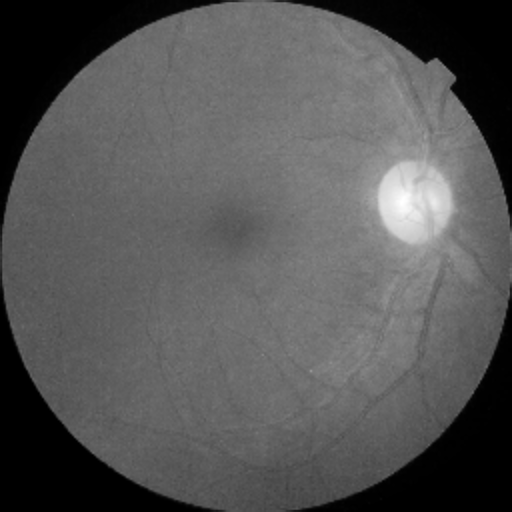

In [101]:
image = Image.fromarray(scaled_adjusted_array)
image

In [100]:
import numpy as np
from skimage.transform import resize

# Create your example array (3 channels, shape (256, 256, 3))
from PIL import Image
image = Image.open(os.path.join(SampleDataDir , sampleRetinalImages[0]))

array = np.array(image)

# array = np.random.randint(0, 228, (256, 256, 3), dtype=np.uint16)

# Step 1: Resize the array from (256, 256, 3) to (512, 512, 3)
resized_array = resize(array, (512, 512, 3), mode='reflect', anti_aliasing=True)

# Step 2: Combine the 3 channels into one (e.g., average across channels)
combined_array = resized_array.mean(axis=2)  # Take the average of the 3 channels

# Step 3: Scale the array to the range [0, 65534]
scaled_adjusted_array = (combined_array / combined_array.max() * 65534).astype(np.uint16)

# Verify the output shape, range, and uniqueness
print(f"Original shape: {array.shape}")
print(f"Resized shape: {resized_array.shape}")
print(f"Output shape: {scaled_adjusted_array.shape}")
print(f"Scaled min: {scaled_adjusted_array.min()}, max: {scaled_adjusted_array.max()}")
print(f"Unique values in output array: {len(np.unique(scaled_adjusted_array))}")


Original shape: (256, 256, 3)
Resized shape: (512, 512, 3)
Output shape: (512, 512)
Scaled min: 0, max: 65534
Unique values in output array: 7752
